README:

2D SWE solver. Author: Max Zhao, Wo Long.

In [1]:
!pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip3 install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install --upgrade imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage
import time
import matplotlib.animation as animation

## if there is an eroor of VideoClip, run cells 2-4

In [6]:
# define domain & physical quantities
x_range = 0.5E+6    ## 1/2 of the range of x
y_range = 0.5E+6      ## 1/2 of the range of y
depth = 100         ## depth of water
density = 997       ## density of water
g = 9.81            ## gravity constant

In [7]:
# define step size & grid construction
##square

pointx = 200        ## number of grid pointer in x-axis
pointy = 200
stepx = pointx-1     ## total number of space step
stepy = pointy-1
x = np.linspace(-x_range, x_range, pointx)
y = np.linspace(-y_range, y_range, pointy) 
grid_x = []
for i in range(pointx):
    grid_x.append(x)
grid_x = np.array(grid_x)
grid_y = []
for i in range(pointy):
    grid_y.append(y)
grid_y = np.transpose(np.array(grid_y))
inital_height = 10  ## the approximated height of inital water column


In [8]:
# preparation for simulation & discretization
delta_x = 2*x_range/stepx    ## step size of x
delta_y = 2*y_range/stepy   ## step size of y
delta_t = np.sqrt(0.5)*min(delta_x, delta_y)/np.sqrt(g*depth)    # by cfl condition
t_final = 5000              #total time step

In [9]:
# specify initial condition
h_current = inital_height + np.exp(-((grid_x-0)**2/(100000**2) + (grid_y-0)**2/(100000**2)))

In [10]:
# construct discretization arrays
empty_grid = np.zeros((pointx, pointy))         ##define intial grid


h_next = empty_grid.copy()

u_current = empty_grid.copy()
u_next = empty_grid.copy()
v_current = empty_grid.copy()
v_next = empty_grid.copy()

x_momentum = empty_grid.copy()
y_momentum = empty_grid.copy()

In [11]:
height_list = [h_current]
for time in range(t_final):

    # print("Mass: ", (4*x_range*y_range*density*np.sum(h_current)/(len(h_current)*len(h_current)))/1E6) ## to check mass-conservation

    # discritize momentum equations
    u_next[:-1, :] = u_current[:-1, :] - g*delta_t/delta_x*(h_current[1:, :] - h_current[:-1, :])
    v_next[:, :-1] = v_current[:, :-1] - g*delta_t/delta_y*(h_current[:, 1:] - h_current[:, :-1])

    u_next[-1, :] = 0
    u_next[0, :] =  0
    v_next[:, 0] = 0 
    v_next[:, -1] = 0


    # discritize continuity equation (lienar continuity)
    x_momentum[0, :] = u_next[0, :] - (-u_current[0, :])
    x_momentum[1:, :] = u_next[1:, :] - u_next[:-1, :]
    x_momentum[-1, :] += -u_current[-1, :]
    x_momentum /= delta_x

    y_momentum[:, 0] = v_next[:, 0] - (-v_current[:, 0])
    y_momentum[:, 1:] = v_next[:, 1:] - v_next[:, :-1]
    y_momentum[:, -1] += -v_current[:, -1]
    y_momentum /= delta_y   

    h_next = h_current - delta_t*depth*(x_momentum + y_momentum)
    
    height_list.append(h_next)

    u_current = np.copy(u_next)
    v_current = np.copy(v_next)
    h_current = np.copy(h_next)
    '''
    multiple shock at the origin point
    if time% 1000 == 0 and time != 0 and time != 5000:
        h_current = inital_height + np.exp(-((grid_x - 0) ** 2 / (100000 ** 2) + (grid_y - 0) ** 2 / (100000 ** 2)))   
    '''
    
height_list_plot = []
for i in range(len(height_list)):
    if i%25 == 0:
        height_list_plot.append(height_list[i])



100%|█████████▉| 500/501 [02:32<00:00,  3.27it/s]


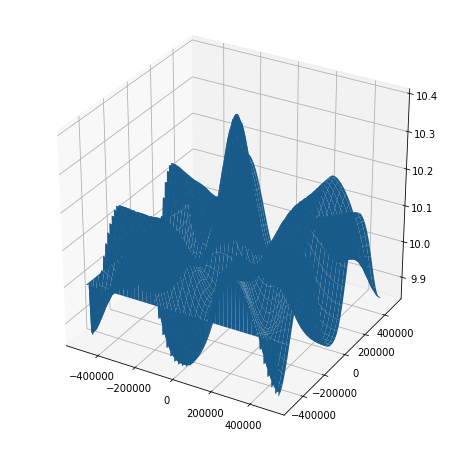

In [12]:
fig = plt.figure(figsize = (8, 8), facecolor = "white")
ax = fig.add_subplot(111, projection='3d')
def make_frame(t):
    ax.clear()
    ax.plot_surface(np.array(grid_x), np.array(grid_y), np.array(height_list_plot)[round(t)])
    
    return mplfig_to_npimage(fig)

duration=25
animation = VideoClip(make_frame, duration = duration)
animation.ipython_display(fps = 20, loop = True, autoplay = True)
plt.show()

Done!


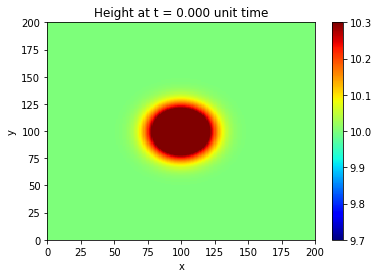

In [13]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#2D heatmap
def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Height at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=inital_height - 0.3, vmax=inital_height + 0.3)
    plt.colorbar()

    return plt


# Do the calculation here
u = np.array(height_list_plot)
##print(u.type())


def animate(k):
    plotheatmap(u[k], k)


anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=201, repeat=False)
anim

print("Done!")

Google colab is not compatible with ffmpeg and moviepy package. Therefore, visualization are produced using .py version.